<center><h1><font style="color:red;">ASSIGNMENT 6</font></h1><br></center>
<h3>

* Name : Achal Rajesh Mate
* Roll No : 2203541
* Enroll No : MITU20BTCSD001
* Branch : CSE
* Class : TY CSE Is - 3
* Guided By : Prof Nagesh Jadhav Sir

<h3><font style="color:red;">Title:- </font>
   Implement K means algorithm on dataset 
</h3>

<h3><font style="color:red;">Objectives:- </font> <br>
1. To learn unsupervised learning<br>
2. To implement K means algorithm
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

### K-Means Algorithm?
* K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.
* It allows us to cluster the data into different groups 
* It is a centroid-based algorithm, where each cluster is associated with a centroid. 
* The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.


 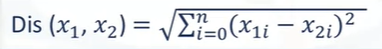
* Distance of samples from each other is used to shape the cluster

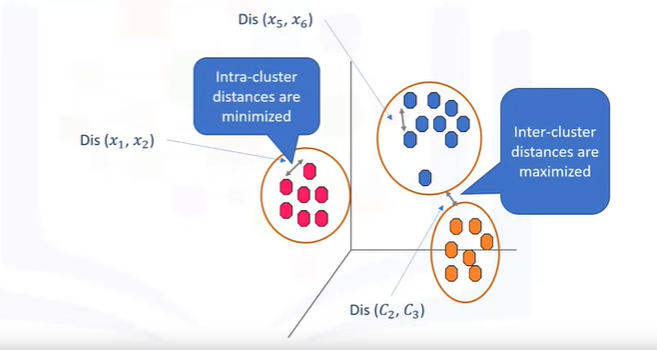

* The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

<b>The k-means clustering algorithm mainly performs two tasks:</b>

* Determines the best value for K center points or centroids by an iterative process.
* Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.
* Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

<b>The below diagram explains the working of the K-means Clustering Algorithm:</b>

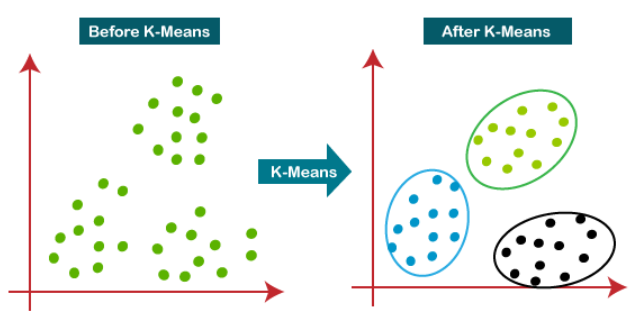

#### Steps to implement K-Means Algorithm
* Step-1: Select the number K to decide the number of clusters.
* Step-2: Select random K points or centroids. (It can be other from the input dataset).
* Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.
* Step-4: Calculate the variance and place a new centroid of each cluster.
* Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.
* Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.
* Step-7: The model is ready.   

### RULE FOR CHOOSING VALUE OF K

- Never go with k=2 as the option because it means you divide the complete data into two halfs and it's not useful for any business case.
- If you have option to choose between two values of K, always go with a lesser value.
- Since we will be taking business decisions based on the cluster result, it's awlays a good idea to go with a lower value of K so that it's easy to take and implement business decisions.
- Silhouette: That value of k for which the score is maximum
- Elbow, you look at the elbow of the curve

### Problem Statement : Customer Segmentation 
### Prolem Context :
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.
### Dataset Link :
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv
### Dataset Information 
This Dataset Contains 10 features with 850 instances
Attributes are 
1. Customer Id,
2. Age
3. Edu
4. Years Employed
5. Income
6. Card Debt
7. Other Debt
8. Defaulted
9. Address
10.DebtIncomeRatio

### Import All Necessary Files

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy import stats
from sklearn.metrics import silhouette_score,accuracy_score,confusion_matrix,classification_report
from sklearn import metrics 

### Read the Dataset

In [ ]:
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

### View Dimension of dataste

In [ ]:
df.shape

#### This dataset contains 850 instance or rows and 10 columns

### Columns in dataset

In [ ]:
df.columns

### Concise Summary

In [ ]:
df.info()

#### form above information we can say that Address feature is in object datatype and defaulted feature contains null values ,Lets check them

In [ ]:
df.isnull().sum()

#### defaulted feature contains 150 NUll values

### Drop the Column That Contains Null Values and Catergorical Values

#### The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables.

In [ ]:
df.Address.value_counts()

In [ ]:
df.drop(['Customer Id','Defaulted','Address'],axis=1,inplace=True)

In [ ]:
df.columns

### Check the outlier by ploting box plot

In [ ]:
f = df.columns[:]

In [ ]:
plt.figure(figsize=(15,15))
for col in enumerate(f):
    plt.subplot(3,3,col[0] + 1)
    sns.boxplot(data=df, x=col[1])

### Drop The Outlier Using Z score

In [ ]:
z = np.abs(stats.zscore(df))
df = df[(z<3).all(axis=1)]
df.shape


#### 48 rows are drop when outliers are removed using Z-score

In [ ]:
plt.figure(figsize=(15,15))
for col in enumerate(f):
    plt.subplot(3,3,col[0] + 1)
    sns.boxplot(data=df, x=col[1])

### Data Normalizing over the standard deviation

In [ ]:
df_scalar = StandardScaler().fit_transform(df)

In [ ]:
df_scalar = pd.DataFrame(df_scalar ,columns=df.columns)

In [ ]:
df_scalar

### Model Building

In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df_scalar)
labels = k_means.labels_
print(labels)

### Let's run K-Means with different value of  K to check SILHOUETTE SCORE

In [ ]:
sil = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k, random_state=0,init = "k-means++", n_init = 12).fit(df_scalar)    
    sil.append([k,silhouette_score(df_scalar,kmean.labels_)])
   

In [ ]:
sil

In [ ]:
sil = pd.DataFrame(sil)
plt.figure(figsize=(10,10))
plt.plot(sil[0], sil[1])
plt.show()

### Choosing Value of K

#### K value with 2 has maximum Silhouette Score is 0.32 but choosing k=2 is not good choice  because it means you divide the complete data into two halfs and it's not useful for any business case.<br> Second Largest Silhouette Score is 0.23 with k= 3,so we can go with k=3


### Let's run K-Means with different value of  K using Elbow Method

In [ ]:
ssd = []
for k in range(2,11):
    kmean_elbow  = KMeans(n_clusters=k).fit(df_scalar)
    ssd.append([k, kmean_elbow.inertia_])
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

#### In Elbow method we you look at the elbow of the curve here K= 3 form elbow of curve so we select k = 3

In [ ]:
kmean = KMeans(n_clusters=3, random_state=0,init = "k-means++", n_init = 12)
kmean.fit(df_scalar)

In [ ]:
labels = k_means.labels_
print(labels)

### Assign the labels to each row in the dataframe.

In [ ]:
df_scalar["Label"] = labels
df_scalar.head(5)

In [ ]:
df_scalar.Label.value_counts()

In [ ]:
df_scalar.groupby('Label').mean()

#### from above result We can easily check the centroid values by averaging the features in each cluste

### conclusion 

#### I have successfully Studied Unsupervised Machine Learning and pratice and implement k- Means Algorithm 

In [ ]:
pred1  = kmean.fit_predict(df_scalar)
score = accuracy_score(df_scalar.Label, pred1)
score

In [ ]:
print(classification_report(df_scalar.Label, pred1))

In [ ]:
label = [0,1,2]

In [ ]:
# confusion matrix
cm = confusion_matrix(df_scalar.Label, pred1)
row_sum = cm.sum(axis=0)
cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
col_sum = cm.sum(axis=1)
cm = np.append(cm,col_sum.reshape(-1,1),axis=1)
labels = label+['Total']
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
yticklabels=labels,linewidths=3,cbar=None,)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

### Conclusion 

#### Thus I have studied unsupervised learning and Successfully Implemented K means algorithm